In [6]:
# Needed imports
from MarkinchiParser import MarkinchiParser as MIParser
from MarkinchiGenerator import MarkinchiGenerator as MIGenerator
import MarkinchiUtils as MIUtils
from rdkit import Chem
from rdkit.Chem import Draw
import os

In [7]:
# Generate a MarkInChI from a V3000 .mol file
filename = "molfiles\\structures_for_testing\\ext88.mol"
filedir = os.path.join(os.getcwd(), filename)

generator = MIGenerator()
generator.get_from_molfile(filedir)
markinchi = generator.generate_markinchi()
print(markinchi)

MarkInChI=1B/C4H5N/c1-2-4-5-3-1/h1-5H<M>5-N!O!S</M>


In [8]:
# Generate a list of Mols from a MarkInChI
parser = MIParser(markinchi)
mol, rgroups = parser.parse_markinchi()
mol_list = MIUtils.enumerate_markush_mol(mol, rgroups)


[#7,#8,#16]
Skipping an invalid molecule


[14:29:02] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4


In [9]:
# Compute the InChI for each Mol in the list of Mols
inchi_list = MIUtils.inchis_from_mol_list(mol_list)

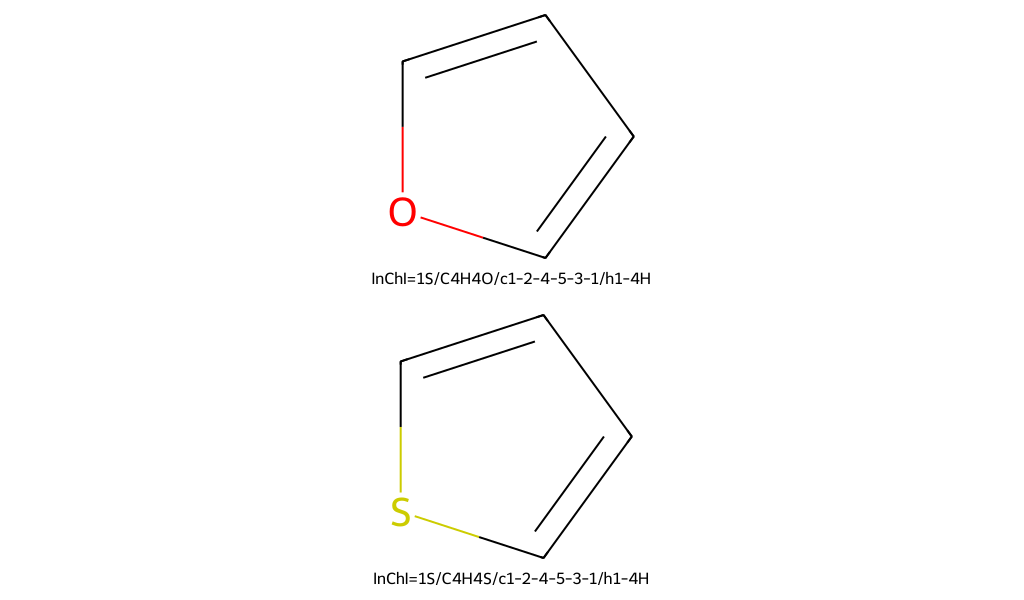

In [10]:
# Show each Mol in the list of Mols along with its InChI
# NB you may need to fiddle around with the parameters to get something legible, depending on how many Mols there are / how long the InChIs are
# If you get a 'File parsing error: PNG header not recognized', this seems to be due to the image being too big - try reducing the height of
# each image using subImgSize, or truncating the list by specifying maxMols

for mol in mol_list:
    Chem.rdDepictor.Compute2DCoords(mol)

Draw.MolsToGridImage(mol_list, molsPerRow=1, maxMols=100, legends=inchi_list, subImgSize=(1024, 300))

[#7,#8,#16]
Skipping an invalid molecule


[14:29:07] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4


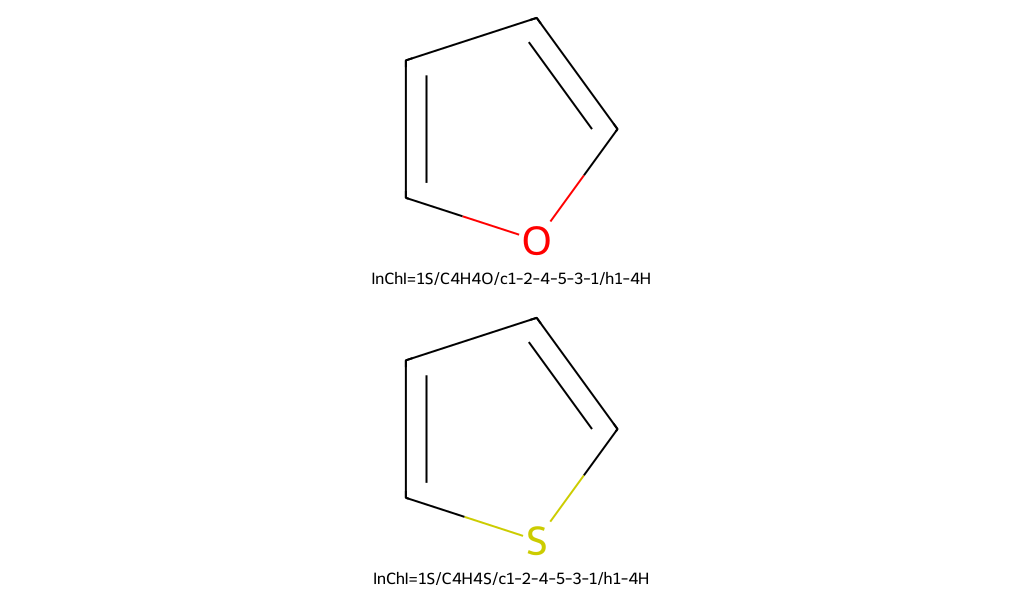

In [11]:
ref_mol, ref_rgroups = MIUtils.parse_molfile(filedir)
MIUtils.show(ref_mol)
ref_mol_list = MIUtils.enumerate_markush_mol(ref_mol, ref_rgroups)
ref_inchi_list = sorted(MIUtils.inchis_from_mol_list(ref_mol_list))

for mol in ref_mol_list:
    Chem.rdDepictor.Compute2DCoords(mol)
    mol = Draw.rdMolDraw2D.PrepareMolForDrawing(mol)
    

Draw.MolsToGridImage(ref_mol_list, molsPerRow=1, maxMols=100, legends=ref_inchi_list, subImgSize=(1024, 300))